# Normalization
> It is necessary to Scale the data prior to modeling. Otherwise, it leads to a biased outcome of predictions in terms of misclassification error and accuracy rates

Some normalization algorithms will be presented:
1. Three straightforward functions implemented in python
2. Several scikit-learn library classes
Different scales of the data features affect the modeling of a dataset adversely.


## 1) Three straightforward functions
Some useful functions that are going to be implemented in python

- Feature scaling: maps to [-1 1] interval

    $x_i = \dfrac{x_i - min}{max - min}$ 
    
- Mean normalization: maps to a length interval 1 with mean value located at 0

    $x_i = \dfrac{x_i - \mu_i}{max - min}$ 

- Z-score normalization:

    $x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$
    
    Centers data and scales the data to unit variance. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def feature_scaling(X):
    min_value = np.min(X, axis=0)
    span  = np.max(X, axis=0) - min_value
    X_norm = (X - min_value) / span      
    return X_norm, min_value, span

In [3]:
def mean_normalization(X):
    mu     = np.mean(X, axis=0)
    span  = np.max(X, axis=0) - np.min(X, axis=0)
    X_norm = (X - mu) / span      
    return X_norm, mu, span

In [4]:
def zscore_normalization(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma      
    return X_norm, mu, sigma

In [5]:
def spiral_dataset():
    randomness = 0
    np.random.seed(1)

    m = 50
    N = int(m / 2)  # number of points per class
    D = 2  # dimensionality
    X = np.zeros((m, D))  # data matrix where each row is a single example
    Y = np.zeros((m, 1), dtype='uint8')  # labels vector (0 for red, 1 for blue)
    a = 2  # maximum ray of the flower

    for j in range(2):

        ix = range(N * j, N * (j + 1))
        if j == 0:
            t = np.linspace(j, 4 * 3.1415 * (j + 1), N)  # + np.random.randn(N)*randomness # theta
            r = 0.3 * np.square(t) + np.random.randn(N) * randomness  # radius
        if j == 1:
            t = np.linspace(j, 2 * 3.1415 * (j + 1), N)  # + np.random.randn(N)*randomness # theta
            r = 0.2 * np.square(t) + np.random.randn(N) * randomness  # radius

        X[ix] = np.c_[r * np.cos(t), r * np.sin(t)]
        Y[ix] = j

    return X, Y

In [6]:
X, Y = spiral_dataset()

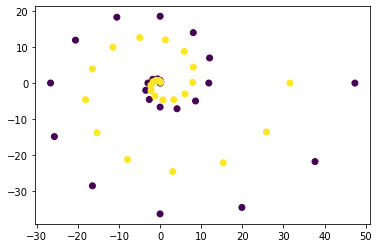

In [7]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot()
plt.show()

(50, 2) [-26.64635905 -36.26865486] [74.01766259 54.77307108]


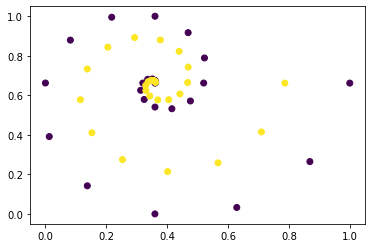

In [8]:
# look up sklearn.MinMaxScaler
X_norm, min_value, span = feature_scaling(X)
print(X_norm.shape, min_value, span)
# Visualize the data
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y)
plt.plot()
plt.show()

(50, 2) [ 1.29481282 -3.05416058] [74.01766259 54.77307108]


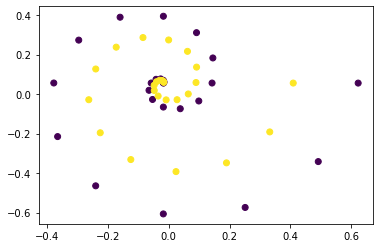

In [9]:
X_norm, mu, span = mean_normalization(X)
print(X_norm.shape, mu, span)
# Visualize the data
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y)
plt.plot()
plt.show()

(50, 2) [ 1.29481282 -3.05416058] [14.01263882 12.05758788]


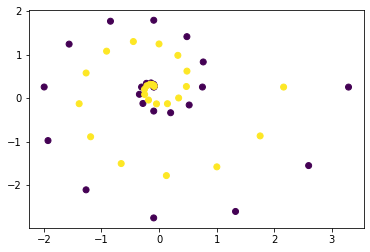

In [10]:
# look up sklearn.StandardScaler
X_norm, mu, sigma = zscore_normalization(X)
print(X_norm.shape, mu, sigma)
# Visualize the data
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y)
plt.plot()
plt.show()

## 2) Scikit-learn classes
Now we're going to see in action some scikit-learn classes for comparison

Peak to Peak range by feature in Normalized data: [1. 1.]


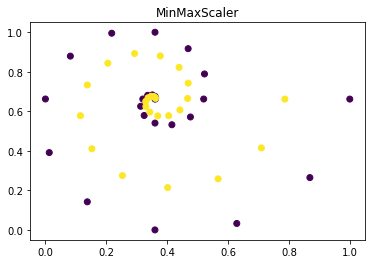

Peak to Peak range by feature in Normalized data: [5.28220727 4.54262259]


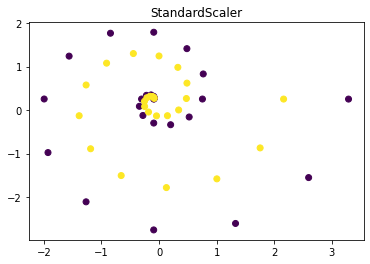

Peak to Peak range by feature in Normalized data: [8.32868304 9.34318318]


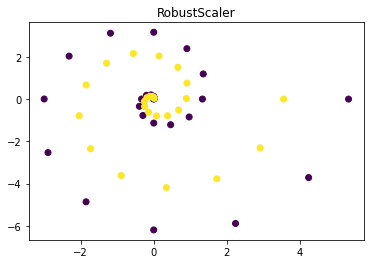

Peak to Peak range by feature in Normalized data: [1.99999998 1.99999999]


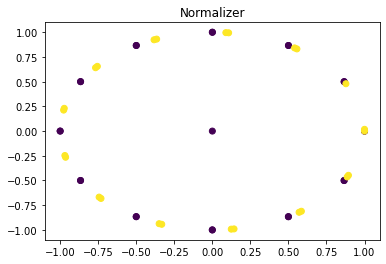

Peak to Peak range by feature in Normalized data: [5.18878399 4.61825617]


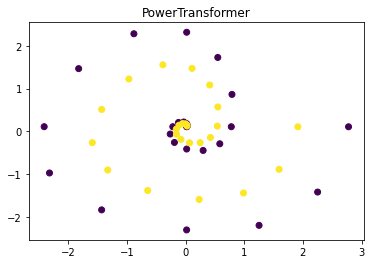

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer
classes = [MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer]

for c in classes:
    scaler, scaler_name = c(), c.__name__
    X_norm = scaler.fit_transform(X)
    print(f"Peak to Peak range by feature in Normalized data: {np.ptp(X_norm,axis=0)}")
    # Visualize the data
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y)
    plt.title(scaler_name)
    plt.plot()
    plt.show()